In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
#import necessary libraries

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

#Define a transform to normalise the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])

#Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


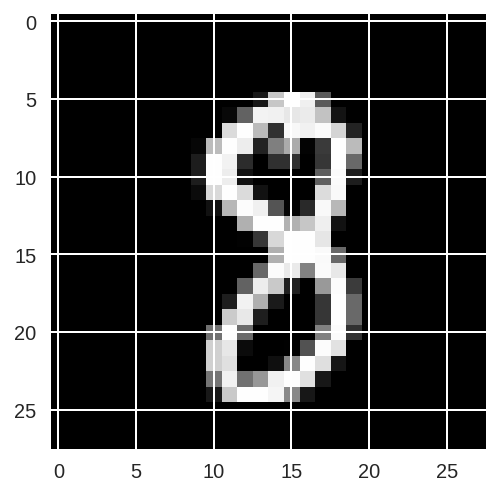

In [0]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r' )

Simple Neural Network


In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

#flatten the input images
input = images.view(images.shape[0], -1)

#Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(input, w1) + b1)
out = torch.mm(h, w2) + b2

In [0]:
out

tensor([[-6.2781e+00,  6.8786e+00,  1.5026e+01, -6.8395e+00, -3.0899e+00,
         -2.7319e+01,  5.5602e+00, -8.3864e+00, -3.9589e+00,  2.9540e+00],
        [ 1.6835e+00, -2.7742e+00,  1.3839e+01, -3.7996e+00, -7.7537e+00,
         -2.8999e+01,  8.5587e-01, -7.2495e+00, -5.5503e+00, -9.7462e-01],
        [-1.3287e+01, -3.0495e+00,  1.9223e+01,  3.5708e+00, -8.0055e+00,
         -2.4434e+01, -3.4996e+00, -1.0071e+01, -1.9383e+00, -1.0362e+00],
        [-1.6529e+00, -4.1472e-01,  5.7511e+00,  6.2630e+00, -5.9041e+00,
         -3.5712e+01, -9.5841e-01, -2.8941e+00, -9.7004e+00,  1.4380e+00],
        [ 9.4990e-02, -3.0579e+00,  1.1774e+01, -3.5112e+00, -7.8479e-01,
         -3.2716e+01, -7.7477e-01, -2.7877e+00,  1.8194e+00, -6.5878e+00],
        [-1.2370e+00, -2.1549e+00,  1.5542e+01, -1.1450e+01, -6.4567e+00,
         -3.2520e+01, -3.7229e+00, -6.9237e+00,  3.7924e+00,  1.0511e+00],
        [ 5.8686e+00, -9.4403e-01,  2.0778e+01, -9.0334e-01, -8.0557e+00,
         -3.1763e+01,  7.4567e+0

In [0]:
#Softmax function

def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

probabilities = softmax(out)

#does it have the right shape? Should be (64, 10)?
print(probabilities.shape)

#does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


**Using nn module to build neural network**

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    #Inputs to hidden layer linear transformation 
    self.hidden = nn.Linear(784, 256)
    
    #Output layer, 10 units - one for each
    self.output = nn.Linear(256, 10)
    
    #Define sigmoid and softmax activation functions
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x
  

In [0]:
#Create network and look and at its the text representatin
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

Neural Network can be define more concisely and clearly using the torch.nn.functional

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    #Inputs to hidden layer linear transformation 
    self.hidden = nn.Linear(784, 256)
    
    #Output layer, 10 units - one for each
    self.output = nn.Linear(256, 10)
    
    
  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    
    x = F.softmax(self.output(x), dim = 1)
   
    
    return x

Using "Sequential"


In [0]:
#Build a feed forward network
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10))

#Define the loss 
criterion = nn.CrossEntropyLoss()

#Get our data 
images, labels = next(iter(trainloader))

#Flatten images 
images = images.view(images.shape[0], -1)

#Forward pass, get our logits
logits = model(images)
#Calculate the loss with logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2975, grad_fn=<NllLossBackward>)


Better to use logsoftmax and negative log lkehood loss 

In [0]:
#Build a feed forward network
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1))

#Define the loss 
criterion = nn.NLLLoss()

#Get our data 
images, labels = next(iter(trainloader))

#Flatten images 
images = images.view(images.shape[0], -1)

#Forward pass, get our logits
logps = model(images)
#Calculate the loss with logits and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3068, grad_fn=<NllLossBackward>)


**Autograd**  automatically calculates the gradients of our tensor
**Optim Package** useful for optimization  

In [0]:
from torch import optim

In [0]:
#Build a feed forward network
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10), nn.LogSoftmax(dim=1))

#Define the loss 
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    #Flatten MNIST images into a 784 long vector 
    images = images.view(images.shape[0], -1)
    
    #TODO: Training pass 
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9410510900686544
Training loss: 0.9200911525088841
Training loss: 0.5508160361094769
Training loss: 0.43888918243682207
Training loss: 0.3889982285720707


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

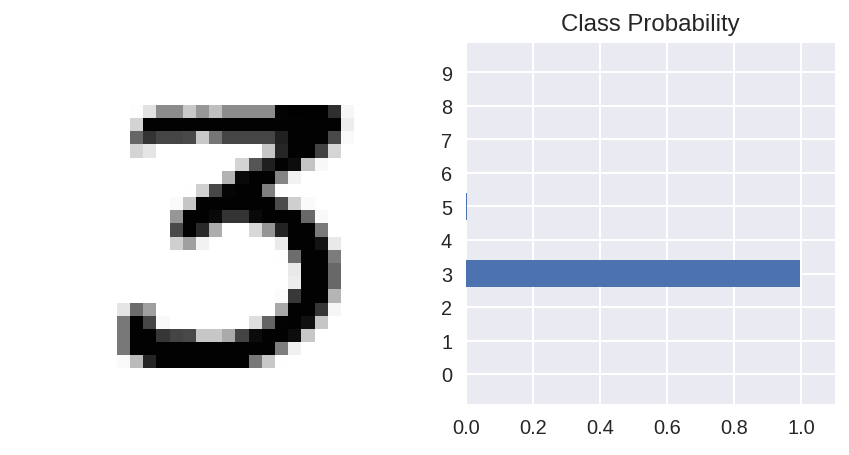

In [0]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
#Turn off gradients to speed up this part 
with torch.no_grad():
  logits = model.forward(img)
  
#Output of the network are logits, need to take softmax for probabilities 
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)

Visit this link for more details - 

https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/Part%202%20-%20Neural%20Networks%20in%20PyTorch%20(Solution).ipynb

https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/Part%203%20-%20Training%20Neural%20Networks%20(Solution).ipynb